In [1]:
import numpy as np
import matplotlib
import sys
import os

fsize=8
Fsize=8
# Set global parameters
matplotlib.rcParams['font.size'] = fsize # global
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Arial'
matplotlib.rcParams['axes.linewidth'] = 0.5
matplotlib.rcParams['mathtext.default'] ='regular' # makes mathtext mode Arial. note mathtext is used as ticklabel font in log plots

# Set global tick mark parameters
matplotlib.rcParams['xtick.major.width'] = 0.5
matplotlib.rcParams['ytick.major.width'] = 0.5
matplotlib.rcParams['xtick.labelsize']= fsize
matplotlib.rcParams['ytick.labelsize'] = fsize
# matplotlib.rcParams['xtick.minor.visible'] = False # need to show mior grid as white outline in maps 
# matplotlib.rcParams['ytick.minor.visible'] = False
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'

from matplotlib.gridspec import GridSpec as gs
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as mpatches
from matplotlib import cm
import matplotlib.ticker as plticker
from matplotlib.colors import ListedColormap
Path = mpath.Path

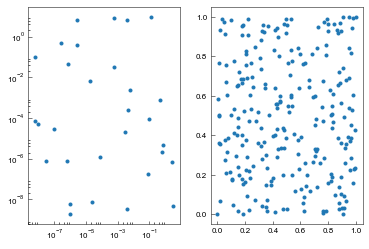

In [37]:
idx_prefix = 1 
numofnodes=25
repts = 50
likelihoodparams_scan = np.load('random_variances.npz')
lambda_pairs = np.load('lambda_pairs_2.npz')
particleconfigs = [ [3,2], [9,6], [15,10] , [21,14], [30, 20]]
max_iterations = 75

path = './data_v2/'
prefix = '_idx_prefix_'+str(idx_prefix)+'_'
datatype=['Uni_R', 'Trunc_R']
keys =  ['marginalised_weights', 'predictive_weights', 'alpha_labels', 'beta_labels', 'rate_of_change_of_len', 'joint_labels', 'posterior_weights', 'joint_weights', 'leaf_weights']

plt.figure()
plt.subplot(121)
plt.loglog(likelihoodparams_scan['g1var'], likelihoodparams_scan['g2var'], '.')

plt.subplot(122)
plt.plot(lambda_pairs['lambda_1'], lambda_pairs['lambda_2'], '.')

plt.show()

In [3]:
# Baseline
bse_typ = 0
bse_1 = 0 # for idx_1 in [3,4,5,6]:#,7,0,1,2]:
bse_2 = 1 # for idx_2 in [3,4,5,6]:#,7,0,1,2]:
bse_3 = 2 # for idx_3 in range(len(particleconfigs)):

base_data = np.load('./data/'+datatype[bse_typ]+prefix+str(bse_1)+'_'+str(bse_2)+'_'+str(bse_3)+'.npz')
baseline_err = np.sum(np.mean(base_data['absolute_errors_matrix'], axis=0), axis=1)

Optimisation

In [4]:
error_scaling_matrix_0 = np.zeros((len(particleconfigs), max_iterations))
error_scaling_matrix_1 = np.zeros((len(particleconfigs), max_iterations))
base_case_scaling_matr = np.zeros((len(particleconfigs), max_iterations))



for idx_pconfig in range(len(particleconfigs)):

    base_data_scaling = np.load('./data/'+datatype[bse_typ]+prefix+str(bse_1)+'_'+str(bse_2)+'_'+str(idx_pconfig)+'.npz')
    base_case_scaling_matr[idx_pconfig, :] = np.sum(np.mean(base_data_scaling['absolute_errors_matrix'], axis=0), axis=1)

uniform_tuning_params= 100*np.ones((30,15,len(particleconfigs)))
truncg_tuning_params = 100*np.ones((30,15,len(particleconfigs)))

for idx_1 in range(30):
    for idx_2 in range(15):
        for idx_pconfig in range(len(particleconfigs)):
            
            try:

                test_data_0 = np.load(path+datatype[0]+prefix+'rand_'+str(idx_1)+'_'+str(idx_2)+'_'+str(idx_pconfig)+'.npz')
                error_scaling_matrix_0[idx_pconfig, :] = np.sum(np.mean(test_data_0['absolute_errors_matrix'], axis=0), axis=1)

                uniform_tuning_params[idx_1, idx_2, idx_pconfig] = error_scaling_matrix_0[idx_pconfig, max_iterations-1]

                test_data_1 = np.load(path+datatype[1]+prefix+'rand_'+str(idx_1)+'_'+str(idx_2)+'_'+str(idx_pconfig)+'.npz')
                error_scaling_matrix_1[idx_pconfig, :] = np.sum(np.mean(test_data_1['absolute_errors_matrix'], axis=0), axis=1)

                truncg_tuning_params[idx_1, idx_2, idx_pconfig] = error_scaling_matrix_1[idx_pconfig, max_iterations-1]
                
            except:
                continue
                
opt_trunc = np.unravel_index(np.argmin(truncg_tuning_params), truncg_tuning_params.shape)
opt_uniform = np.unravel_index(np.argmin(uniform_tuning_params), uniform_tuning_params.shape)
print "Optimal trunc termination error:", truncg_tuning_params[opt_trunc], "Params:", opt_trunc
print "Optimal uniform termination error:", uniform_tuning_params[opt_uniform], "Params:", opt_uniform

ordered_error_vals = np.argsort(truncg_tuning_params.flatten())
min_error_params = [np.unravel_index(ordered_error_vals[idx], truncg_tuning_params.shape) for idx in range(len(ordered_error_vals)) ] 


Optimal trunc termination error: 8.07491489817 Params: (0, 12, 3)
Optimal uniform termination error: 8.9811860923 Params: (0, 12, 3)


In [5]:
min_error_params

[(0, 12, 3),
 (0, 8, 2),
 (0, 12, 2),
 (0, 12, 1),
 (0, 12, 4),
 (0, 8, 4),
 (0, 12, 0),
 (0, 8, 1),
 (0, 13, 1),
 (0, 13, 2),
 (0, 13, 0),
 (0, 13, 3),
 (0, 8, 3),
 (0, 13, 4),
 (0, 8, 0),
 (0, 11, 0),
 (0, 11, 1),
 (0, 7, 0),
 (0, 11, 2),
 (0, 11, 4),
 (0, 7, 3),
 (0, 11, 3),
 (0, 7, 2),
 (0, 7, 1),
 (0, 7, 4),
 (0, 4, 0),
 (0, 6, 0),
 (0, 5, 0),
 (0, 3, 0),
 (0, 4, 1),
 (0, 10, 0),
 (0, 4, 4),
 (0, 6, 1),
 (0, 4, 2),
 (0, 6, 4),
 (0, 6, 2),
 (0, 6, 3),
 (0, 4, 3),
 (0, 9, 0),
 (0, 1, 0),
 (0, 3, 2),
 (0, 5, 4),
 (0, 5, 1),
 (0, 2, 0),
 (0, 3, 3),
 (0, 3, 1),
 (0, 14, 0),
 (0, 5, 2),
 (0, 1, 3),
 (0, 5, 3),
 (0, 1, 1),
 (0, 9, 1),
 (0, 3, 4),
 (0, 1, 4),
 (0, 9, 3),
 (0, 1, 2),
 (0, 9, 2),
 (0, 2, 2),
 (0, 2, 1),
 (0, 2, 3),
 (0, 10, 3),
 (0, 10, 1),
 (0, 14, 1),
 (0, 9, 4),
 (0, 10, 4),
 (0, 2, 4),
 (0, 10, 2),
 (0, 14, 3),
 (0, 14, 4),
 (0, 14, 2),
 (0, 0, 1),
 (0, 0, 4),
 (0, 0, 3),
 (1, 0, 3),
 (0, 0, 2),
 (1, 0, 2),
 (1, 0, 0),
 (0, 0, 0),
 (1, 0, 1),
 (20, 7, 0),
 (20, 6, 4),
 

Case Analysis

In [32]:
# looks nice (0,12), (0,8)
idx_1 = 0 #4
idx_2 = 12 #6

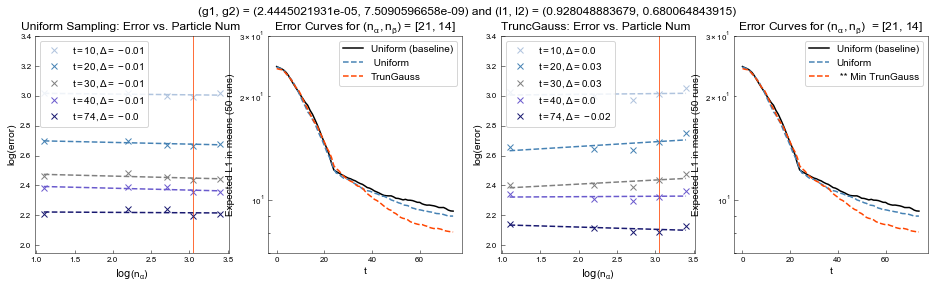

In [33]:
colors = ['midnightblue', 'slateblue',  'gray', 'steelblue', 'lightsteelblue']
colors=colors[::-1]
times =[10, 20, 30, 40 ,74]

error_scaling_matrix_0 = 100.*np.ones((len(particleconfigs), max_iterations))
error_scaling_matrix_1 = 100.*np.ones((len(particleconfigs), max_iterations))

    
for idx_pconfig in range(len(particleconfigs)):
    
    test_data_0 = np.load(path+datatype[0]+prefix+'rand_'+str(idx_1)+'_'+str(idx_2)+'_'+str(idx_pconfig)+'.npz')
    error_scaling_matrix_0[idx_pconfig, :] = np.sum(np.mean(test_data_0['absolute_errors_matrix'], axis=0), axis=1)

    test_data_1 = np.load(path+datatype[1]+prefix+'rand_'+str(idx_1)+'_'+str(idx_2)+'_'+str(idx_pconfig)+'.npz')
    error_scaling_matrix_1[idx_pconfig, :] = np.sum(np.mean(test_data_1['absolute_errors_matrix'], axis=0), axis=1)

particle_number = np.asarray([idp[0] for idp in particleconfigs] ) 

idx_pconfig_U = np.argmin(error_scaling_matrix_0[:,74])
idx_pconfig_T = np.argmin(error_scaling_matrix_1[:,74])
    
plt.figure(figsize=(16,4))

plt.suptitle('(g1, g2) = (%s, %s) and (l1, l2) = (%s, %s)' %(likelihoodparams_scan['g1var'][idx_1], 
                                                             likelihoodparams_scan['g2var'][idx_1],
                                                             lambda_pairs['lambda_1'][idx_2],
                                                             lambda_pairs['lambda_2'][idx_2],
                                                             
                                                            ),
            )

plt.subplot(141)
plt.title('Uniform Sampling: Error vs. Particle Num ')

for idx_t in range(5):

    slope, intercept = np.polyfit(np.log(particle_number), np.log(error_scaling_matrix_0[:, times[idx_t]]), 1)

    plt.plot(np.log(particle_number), np.log( error_scaling_matrix_0[:, times[idx_t]]), 
             'x', c= colors[idx_t], label= r'$t=%s, \Delta = %s$'%(times[idx_t], np.round(slope, 2)))
    
    trendpoly = np.poly1d([slope,intercept]) 
    
    plt.plot(np.log(particle_number),trendpoly(np.log(particle_number)), '--',  c= colors[idx_t])
    
    plt.axvline(x=np.log(particleconfigs[idx_pconfig_U][0]), ls='-', lw=0.5, c='orangered', alpha=0.5)
    
# plt.yscale('log')
plt.xlabel(r'$\log(n_\alpha)$')
plt.ylabel('log(error)')
plt.legend(loc=0)
plt.ylim([np.log(7), np.log(30)])


plt.subplot(143)
plt.title('TruncGauss: Error vs. Particle Num ')



for idx_t in range(5):

    slope, intercept = np.polyfit(np.log(particle_number), np.log(error_scaling_matrix_1[:, times[idx_t]]), 1)

    plt.plot(np.log(particle_number), np.log( error_scaling_matrix_1[:, times[idx_t]]), 
             'x', c= colors[idx_t], label= r'$t=%s, \Delta = %s$'%(times[idx_t], np.round(slope, 2)))
    
    trendpoly = np.poly1d([slope,intercept]) 
    
    plt.plot(np.log(particle_number),trendpoly(np.log(particle_number)), '--',  c= colors[idx_t])
    
    plt.axvline(x=np.log(particleconfigs[idx_pconfig_T][0]), ls='-', lw=0.5, c='orangered', alpha=0.5)
    
plt.xlabel(r'$\log(n_\alpha)$')
plt.ylabel('log(error)')
plt.legend(loc=0)
plt.ylim([np.log(7), np.log(30)])

plt.subplot(142)

plt.title(r'Error Curves for $(n_\alpha, n_\beta)$ = %s'%(particleconfigs[idx_pconfig_U]))
plt.plot(base_case_scaling_matr[bse_3, :], '-', c='k', label='Uniform (baseline)')

plt.plot(error_scaling_matrix_0[idx_pconfig_U, :], '--', c='steelblue',label=' Uniform ')
plt.plot(error_scaling_matrix_1[idx_pconfig_U, :], '--', c='orangered',label='TrunGauss')

plt.xlabel('t')
plt.ylabel('Expected L1 in means (50 runs)')
plt.yscale('log')
plt.legend(loc=0)
plt.ylim([7, 30])

plt.subplot(144)

plt.title(r'Error Curves for $(n_\alpha, n_\beta)$  = %s'%(particleconfigs[idx_pconfig_T]))
plt.plot(base_case_scaling_matr[bse_3, :], '-', c='k', label='Uniform (baseline)')

plt.plot(error_scaling_matrix_0[idx_pconfig_T, :], '--', ms=3, c='steelblue', label='Uniform')
plt.plot(error_scaling_matrix_1[idx_pconfig_T, :], '--',  ms=3, c='orangered', label=' ** Min TrunGauss')

plt.xlabel('t')
plt.ylabel('Expected L1 in means (50 runs)')
plt.yscale('log')

plt.legend(loc=0)
plt.ylim([7, 30])


    
plt.show()

 START


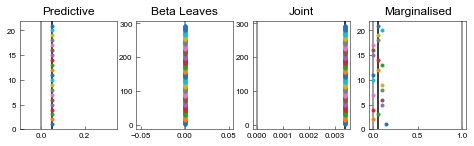

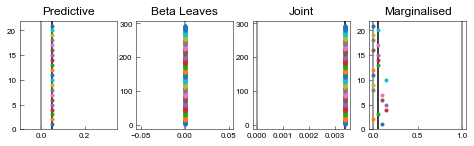

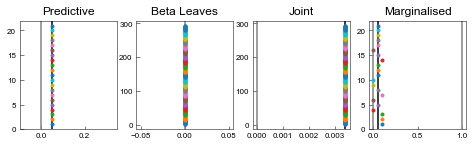

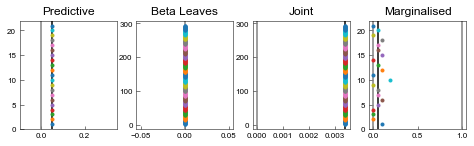

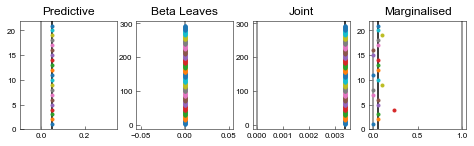

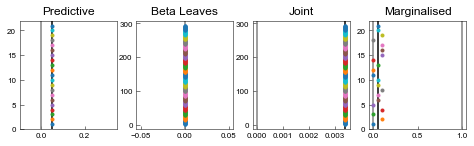

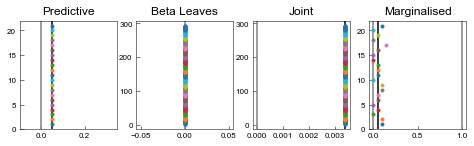

 START


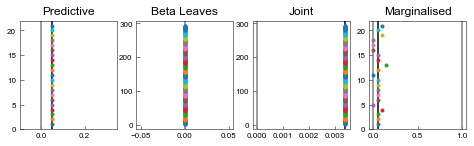

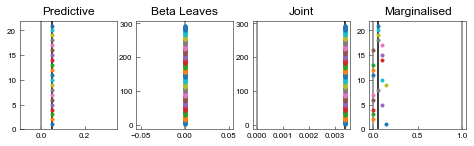

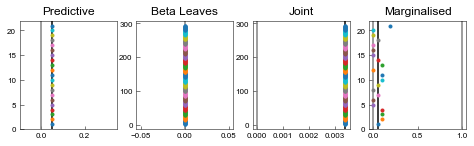

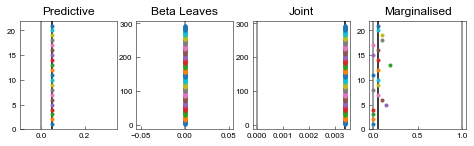

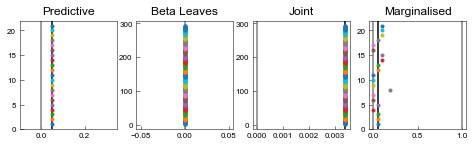

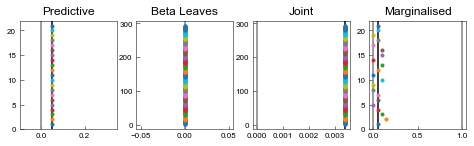

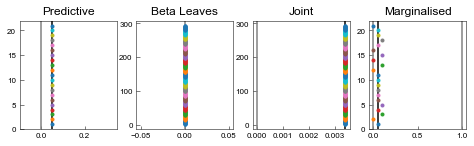

In [34]:
test_data_0 = np.load(path+datatype[0]+prefix+'rand_'+str(idx_1)+'_'+str(idx_2)+'_'+str(idx_pconfig_U)+'.npz')
test_data_1 = np.load(path+datatype[1]+prefix+'rand_'+str(idx_1)+'_'+str(idx_2)+'_'+str(idx_pconfig_T)+'.npz')

for datamatrix in [test_data_0, test_data_1]:

    for key in keys:
        vars()[key] = datamatrix[key]
          
    n_a = 1. / np.float(len(alpha_labels))
    n_ab = 1. / np.float(len(alpha_labels)*len(beta_labels))
    
    print " START"

    for idxt in [0, 1, 2, 5, 10, 35, 70]:

        plt.figure(figsize=(8,2))

        plt.subplot(141)
        plt.title('Predictive')
        plt.axvline(x=n_a, c='k')
        plt.axvline(x=0., c='gray')
        plt.axvline(x=1., c='gray')
        for idx_a in range(len(alpha_labels)):
            plt.plot(predictive_weights[idxt][idx_a], alpha_labels[idx_a], '.')
        plt.xlim([-0.1, n_a +.3])


        plt.subplot(142)
        plt.title('Beta Leaves')
        plt.axvline(x=0., c='gray')
        #plt.axvline(x=1., c='gray')
        for idx_a in range(len(alpha_labels)):
            plt.plot(leaf_weights[idxt][idx_a,], 
                     joint_labels[idx_a*len(beta_labels) : len(beta_labels)*(1+idx_a)], '.')
        #plt.xlim([-0.1, 1.1])
        #plt.xscale('log')

        plt.subplot(143)
        plt.title('Joint')
        plt.axvline(x=n_ab, c='k')
        plt.axvline(x=0., c='gray')
        #plt.axvline(x=1., c='gray')
        for idx_a in range(len(alpha_labels)):
            plt.plot(joint_weights[idxt][idx_a*len(beta_labels) : len(beta_labels)*(1+idx_a)], 
                     joint_labels[idx_a*len(beta_labels) : len(beta_labels)*(1+idx_a)],
                     '.')
        #plt.xlim([-0.1, n_ab +.2])

        plt.subplot(144)
        plt.title('Marginalised')
        plt.axvline(x=n_a, c='k')
        plt.axvline(x=0., c='gray')
        plt.axvline(x=1., c='gray')
        for idx_a in range(len(alpha_labels)):
            plt.plot(marginalised_weights[idxt][idx_a], alpha_labels[idx_a], '.')
        
        #plt.xlim([-0.1, n_a +.3])
        

        #plt.xscale('log')

    #     plt.subplot(155)
    #     plt.title('Posterior')
    #     plt.plot(posterior_weights[idxt], alpha_labels, '.')
    #     plt.xlim([0, 1])

        plt.show()


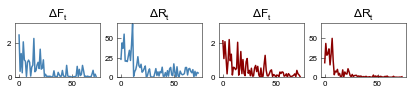

In [35]:
rate_of_change_of_map_0 = test_data_0['rate_of_change_of_map'][np.random.randint(low=0, high=50)]
rate_of_change_of_len_0 = test_data_0['rate_of_change_of_len'][np.random.randint(low=0, high=50)]
rate_of_change_of_map_1 = test_data_1['rate_of_change_of_map'][np.random.randint(low=0, high=50)]
rate_of_change_of_len_1 = test_data_1['rate_of_change_of_len'][np.random.randint(low=0, high=50)]

plt.figure(figsize=(7, 1.))


plt.subplot(141)
plt.title(r"$ \Delta F_t$")
plt.plot(np.sum(rate_of_change_of_map_0, axis=1)[1:], c='steelblue')
plt.ylim([0., 3.2])


plt.subplot(142)
plt.title(r"$ \Delta R_t$")
plt.plot(np.sum(rate_of_change_of_len_0, axis=1)[1:], c='steelblue')
plt.ylim([0.00, 70])
#plt.yscale('log')


plt.subplot(143)
plt.title(r"$ \Delta F_t$")
plt.plot(np.sum(rate_of_change_of_map_1, axis=1)[1:], c='darkred')
plt.ylim([0., 3.2])


plt.subplot(144)
plt.title(r"$ \Delta R_t$")
plt.plot(np.sum(rate_of_change_of_len_1, axis=1)[1:], c='darkred')
plt.ylim([0.0, 70])
#plt.yscale('log')
plt.show()